In [ ]:
#!git clone https://github.com/DIAGNijmegen/picai_labels
#!mv /content/picai_labels /content/drive/MyDrive/picai-challenge-data
!pip install medpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.0 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214946 sha256=f3bd807d619cda941ded57ac875f5fa9d8589716d372e9a82f32d5ef685daa93
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from medpy.io import load
import torchvision
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [ ]:
import requests
from zipfile import ZipFile
class picai_handler:
  
  def __init__(self, path = '/content/drive/MyDrive', howMany = 5):
    self.howMany = howMany
    if(self.doPaths(path) == -1):
      return None
    if(self.download_zips() == -1):
      return None
    self.extract_zips()

  def doPaths(self, path):
    self.zipPaths = {}
    self.dataFolder = ''
    self.zipFolder = ''
    if (path[-1] == '/'):
      path = path[:-1]
    if (path[0] != '/'):
      path = '/'+path
    if not (os.path.isdir(path)):
      print("Path is not a directory.")
      return -1
    self.dataFolder = path + '/picai-challenge-data'

    if not (os.path.isdir(self.dataFolder)):
      os.mkdir(self.dataFolder)
    self.zipFolder = self.dataFolder+'/zips'
    if not (os.path.isdir(self.zipFolder)):
      os.mkdir(self.zipFolder)
    self.unzippedFolder = self.dataFolder+"/unzipped"
    if not (os.path.isdir(self.unzippedFolder)):
      os.mkdir(self.unzippedFolder)

    for x in range(self.howMany):
      self.zipPaths[x] = ('picai_public_images_fold'+str(x)+'.zip')
    self.zipPaths["license"] = "LICENSE"
    self.zipPaths["readme"] = "README.md"
  
  def download_zips(self):
    howManyZips = self.howMany
    if(howManyZips > 5):
      print("Too many ZIP files specified. Actual PICAI only has max of 5.")
      return -1
    for key, fileName in self.zipPaths.items():
      if (isinstance(key,int)):
        if key < howManyZips:
          pass
        else:
          continue
      totName = self.zipFolder+'/'+fileName
      if not(os.path.isfile(totName)):
        print("Downloading "+fileName)
        File = requests.get('https://zenodo.org/record/6624726/files/'+fileName+'?download=1', stream = True) 
        with open(totName, "wb") as fule: 
          for block in File.iter_content(chunk_size = 1024):
            if block: 
              fule.write(block)
        print("Downloaded "+fileName)
      else:
        print(fileName + " already exists in " + self.zipFolder)
  
  def extract_zips(self):

    for x in range(self.howMany):
      
      if not(os.path.isdir(self.unzippedFolder + '/' + self.zipPaths[x][:-4])):
        with ZipFile(self.zipFolder+'/'+ self.zipPaths[x], 'r') as zap:
          print("Extracting " + self.zipPaths[x])
          zap.extractall(self.unzippedFolder + '/' + self.zipPaths[x][:-4])
          print('Done!')
      else:
        print(self.unzippedFolder + '/' + self.zipPaths[x][:-4]+' already exists in', self.unzippedFolder)
    return 0


In [ ]:
#For google colab, outputs the folder to My Drive of the google drive.
#picai = picai_handler()

#General case, outputs the folder to current directory.
#picai = picai_handler(os.getcwd(), 1)

In [ ]:
#!rsync -a /content/drive/MyDrive/picai-challenge-data/unzipped/picai_public_images_fold0/ /content/drive/MyDrive/picai-challenge-data/merged_unzipped/
#!rsync -a /content/drive/MyDrive/picai-challenge-data/unzipped/picai_public_images_fold1/ /content/drive/MyDrive/picai-challenge-data/merged_unzipped/
#!rsync -a /content/drive/MyDrive/picai-challenge-data/unzipped/picai_public_images_fold2/ /content/drive/MyDrive/picai-challenge-data/merged_unzipped/
#!rsync -a /content/drive/MyDrive/picai-challenge-data/unzipped/picai_public_images_fold3/ /content/drive/MyDrive/picai-challenge-data/merged_unzipped/
#!rsync -a /content/drive/MyDrive/picai-challenge-data/unzipped/picai_public_images_fold4/ /content/drive/MyDrive/picai-challenge-data/merged_unzipped/

In [ ]:
marksheet = '/content/drive/MyDrive/picai-challenge-data/picai_labels/clinical_information/marksheet.csv'
marksheet = pd.read_csv(marksheet)
marksheet = marksheet

In [ ]:
marksheet

,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,case_ISUP,case_csPCa
0,10000,1000000,2019-07-02,73,7.70,NaN,55.0,MRBx,0+0,0,0,NO
1,10001,1000001,2016-05-27,64,8.70,0.09,102.0,NaN,NaN,NaN,0,NO
2,10002,1000002,2021-04-18,58,4.20,0.06,74.0,NaN,NaN,NaN,0,NO
3,10003,1000003,2019-04-05,72,13.00,NaN,71.5,SysBx,0+0,0,0,NO
4,10004,1000004,2020-10-21,67,8.00,0.10,78.0,SysBx+MRBx,"0+0,0+0","0,0",0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,11471,1001495,2012-08-25,71,12.50,0.21,62.0,MRBx,"3+4,N/A,3+3","2,1",2,YES
1496,11472,1001496,2019-06-28,81,5.28,0.12,44.0,SysBx+MRBx,3+4,2,2,YES
1497,11473,1001497,2017-09-24,56,29.60,0.34,87.0,MRBx,0+0,0,0,NO
1498,11474,1001498,2016-05-03,71,12.00,NaN,83.0,MRBx,3+3,1,1,NO


In [ ]:
marksheet.set_index("study_id")["case_ISUP"][1001495]

2

In [ ]:
class dataset_OLD():
  def __init__(self, img_dir, label_dir, marksheet, transform=None, target_transform=None, resizeLen = 500):
    
    self.img_names = []
    self.label_dir = label_dir
    self.resizeLen = resizeLen
    for entry in os.scandir(label_dir):
      self.img_names.append(entry.name[:-7])

    self.marksheet = pd.read_csv(marksheet)
    self.marksheet = self.marksheet.set_index("study_id")["case_ISUP"]
    
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
  def length(self):
    return len(self.img_names)
  def getitem(self, idx):
    label_path = self.label_dir+ '/' + self.img_names[idx] + '.nii.gz'
    img_path = self.img_dir + '/' + self.img_names[idx][:5] + '/'+ self.img_names[idx] +'_t2w.mha'
    ISUP_case = self.marksheet[int(self.img_names[idx][-7:])]
    image, header = load(img_path)
    label, label_header = load(label_path)
    image = torch.from_numpy(image.transpose(2,0,1).astype(np.int16))
    label = torch.from_numpy(label.transpose(2,0,1).astype(np.int16))
    resizer = torchvision.transforms.Resize((self.resizeLen,self.resizeLen), antialias=False)
    image = resizer(image)
    label = resizer(label)
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label, ISUP_case

from torch.utils.data import Dataset

class dataset(Dataset):
  def __init__(self, img_dir, label_dir, marksheet, transform=None, target_transform=None, resizeLen = (25,100,100), fileI = None, fileL = None):
    
    self.img_names = []
    self.label_dir = label_dir
    for entry in os.scandir(label_dir):
      self.img_names.append(entry.name[:-7])
    self.marksheet = pd.read_csv(marksheet)
    self.marksheet = self.marksheet.set_index("study_id")["case_ISUP"]
    self.resizer = torchvision.transforms.Resize((resizeLen[1],resizeLen[2]), antialias=False)
    self.resizer2 = torchvision.transforms.Resize((resizeLen[0],resizeLen[2]), antialias=False)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

    self.storeI = []
    self.storeL = []
    if not (fileI and fileL):
      for idx in range(len(self.img_names)):
        
        img_path = self.img_dir + '/' + self.img_names[idx][:5] + '/'+ self.img_names[idx] +'_t2w.mha'
        label_path = self.label_dir+ '/' + self.img_names[idx] + '.nii.gz'
        image, header = load(img_path)
        label, label_header = load(label_path)
        image = torch.from_numpy(image.transpose(2,0,1).astype(np.int16))
        label = torch.from_numpy(label.transpose(2,0,1).astype(np.int16))
        image = self.resizer(image)
        image = self.resizer2(image.permute(1,0,2)).permute(1,0,2).reshape(1,resizeLen[0],resizeLen[1],resizeLen[2]).numpy()
        label = self.resizer(label)
        label = self.resizer2(label.permute(1,0,2)).permute(1,0,2).reshape(1,resizeLen[0],resizeLen[1],resizeLen[2]).numpy()
        self.storeI.append(image)
        self.storeL.append(label)
      self.storeI = np.concatenate(self.storeI)
      self.storeL = np.concatenate(self.storeL)
    else:
      self.storeI = np.load(fileI)
      self.storeL = np.load(fileL)
  def __len__(self):
    return len(self.img_names)
  
  def __getitem__(self, idx, permute = (0,1,2)):
    ISUP_case = self.marksheet[int(self.img_names[idx][-7:])]
    image = torch.from_numpy(self.storeI[idx])
    label = torch.from_numpy(self.storeL[idx])
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image.permute(permute), label.permute(permute), ISUP_case

In [ ]:
#dataset = datasetdataset('/content/drive/MyDrive/picai-challenge-data/merged_unzipped', '/content/drive/MyDrive/picai-challenge-data/picai_labels/csPCa_lesion_delineations/human_expert/resampled', None, None, 200)
#I = 0
#for x in range(dataset.length()):
  #if dataset.getitem(x)[1].sum() > 0:
    #I+=1
#print(I)

In [ ]:
# dataset = datasetdataset('/content/drive/MyDrive/picai-challenge-data/merged_unzipped', '/content/drive/MyDrive/picai-challenge-data/picai_labels/csPCa_lesion_delineations/AI/Bosma22a','/content/drive/MyDrive/picai-challenge-data/picai_labels/clinical_information/marksheet.csv', None, None, resizeLen = 104)

In [ ]:
from torch.utils.data import DataLoader
merged_unzipped = '/content/drive/MyDrive/picai-challenge-data/merged_unzipped'
lesion_delin = '/content/drive/MyDrive/picai-challenge-data/picai_labels/csPCa_lesion_delineations/AI/Bosma22a'
marksheet_p = '/content/drive/MyDrive/picai-challenge-data/picai_labels/clinical_information/marksheet.csv'
fileI = "/content/drive/MyDrive/picai-challenge-data/50_104_104I.npy"
fileL = "/content/drive/MyDrive/picai-challenge-data/50_104_104L.npy"
dataset = dataset(merged_unzipped, lesion_delin,marksheet_p, None, None, resizeLen = (50,104,104), fileI = fileI, fileL = fileL)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
#np.save("/content/drive/MyDrive/picai-challenge-data/50_104_104I",dataset.badIdeaI)
#np.save("/content/drive/MyDrive/picai-challenge-data/50_104_104L", dataset.badIdeaL)

In [ ]:
for batch in loader:
  a,b,c = batch
  break
a.shape

torch.Size([1, 50, 104, 104])

In [ ]:
import torch
import torch.nn as nn

# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()

#         # Encoder layers
#         self.encoder = nn.Sequential(
#             nn.Conv3d(1, 16, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.Conv3d(16, 16, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.Conv3d(16, 16, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.MaxPool3d(kernel_size=2, stride=2),
#             nn.Conv3d(16, 32, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.Conv3d(32, 32, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.Conv3d(32, 32, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.MaxPool3d(kernel_size=(1,2,2), stride=2),
#             nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.Conv3d(64, 64, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.Conv3d(64, 64, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid(),
#             nn.MaxPool3d(kernel_size=(1,2,2), stride=2)
#         )

#         # Decoder layers
#         self.decoderR = nn.Sequential(
#             nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=(0,1,1)),
#             nn.Sigmoid(),
#             nn.Conv3d(32,32,3,1,1),
#             nn.Sigmoid(),
#             nn.Conv3d(32,32,3,1,1),
#             nn.Sigmoid(),
#             nn.ConvTranspose3d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=(0,1,1)),
#             nn.Sigmoid(),
#             nn.Conv3d(16,16,3,1,1),
#             nn.Sigmoid(),
#             nn.Conv3d(16,16,3,1,1),
#             nn.Sigmoid(),
#             nn.ConvTranspose3d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.Conv3d(1,1,3,1,1),
#             nn.Sigmoid(),
#             nn.Conv3d(1,1,3,1,1),
#             nn.Sigmoid()
#         )
#         # self.decoder = nn.Sequential(
#         #     nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=(0,1,1)),
#         #     nn.ReLU(),
#         #     nn.Conv3d(32,32,3,1,1),
#         #     nn.ReLU(),
#         #     nn.Conv3d(32,32,3,1,1),
#         #     nn.ReLU(),
#         #     nn.ConvTranspose3d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=(0,1,1)),
#         #     nn.ReLU(),
#         #     nn.Conv3d(16,16,3,1,1),
#         #     nn.ReLU(),
#         #     nn.Conv3d(16,16,3,1,1),
#         #     nn.ReLU(),
#         #     nn.ConvTranspose3d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
#         #     nn.Conv3d(1,1,3,1,1),
#         #     nn.ReLU(),
#         #     nn.Conv3d(1,1,3,1,1),
#         #     nn.ReLU()
#         # )
#         # self.linear = nn.Sequential(
#         #     nn.Conv3d(64,1,1,1,0),
#         #     nn.Flatten(),
#         #     nn.Linear(1183, 845),
#         #     nn.ReLU(),
#         #     nn.Linear(845,169),
#         #     nn.ReLU(),
#         #     nn.Linear(169, 6),
#         #     nn.ReLU()
#         # )
#     def forward(self, x):
#         # Encoder
#         encoded_vals = self.encoder(x)
#         # Decoder
#         #ISUP = self.linear(encoded_vals)
#         reconstructed = self.decoderR(encoded_vals)
#         #labeled = self.decoder(encoded_vals)
#         return reconstructed

In [ ]:
# from torch.nn.modules.flatten import Flatten
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()

#         # Encoder layers
#         self.encoder = nn.Sequential(
#             nn.Conv3d(1, 8, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool3d(kernel_size=(1,2,2), stride=(1,2,2)),
#             nn.Conv3d(8, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool3d(kernel_size=(1,2,2), stride=(1,2,2))
#         )

#         # Decoder layers
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose3d(64, 8, kernel_size=3, stride=(1,2,2), padding=1, output_padding=(0,1,1)),
#             nn.ReLU(),
#             nn.ConvTranspose3d(8, 1, kernel_size=3, stride=(1,2,2), padding=1, output_padding=(0,1,1)),
#             nn.ReLU()
#             # nn.ConvTranspose3d(16, 1, kernel_size=3, stride=(1,2,2), padding=1, output_padding=(0,1,1)),
#             # nn.Tanh()
#         )

#         self.decoder2 = nn.Sequential(
#             nn.ConvTranspose3d(64, 8, kernel_size=3, stride=(1,2,2), padding=1, output_padding=(0,1,1)),
#             nn.ReLU(),
#             nn.ConvTranspose3d(8, 1, kernel_size=3, stride=(1,2,2), padding=1, output_padding=(0,1,1)),
#             nn.ReLU()
#             # nn.ConvTranspose3d(16, 1, kernel_size=3, stride=(1,2,2), padding=1, output_padding=(0,1,1)),
#             # nn.Tanh()
#         )
#         self.linear =  nn.Sequential(nn.Conv3d(64,1, kernel_size=(1,2,2), stride=1),
#                                      nn.MaxPool3d(kernel_size=(5,2,2), stride=(5,2,2)), 
#                                      nn.ReLU(),
#                                      nn.Flatten(),
#                                      nn.Linear(1440, 720),
#                                      nn.ReLU(),
#                                      nn.Linear(720, 360),
#                                      nn.ReLU(),
#                                      nn.Linear(360,6)
#                                      )
                                     
#     def forward(self, x):
#         # Encoder
#         x = self.encoder(x)
#         # Decoder
#         recon = self.decoder(x)
#         labeled = self.decoder2(x)
#         out = self.linear(x)
#         return labeled, recon, out

In [ ]:
import torch.nn.functional as F
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True))
    def forward(self, x):
        return self.double_conv(x)
    
class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels))
    def forward(self, x):
        return self.maxpool_conv(x)
    
class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels//2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels//2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        
        x1 = F.pad(x1, [diffX//2, diffX-diffX//2,
                        diffY//2, diffY-diffY//2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1),
            nn.Sigmoid())
    def forward(self, x):
        return self.conv(x)

In [ ]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024//factor)

        self.up1 = Up(1024, 512//factor, bilinear)
        self.up2 = Up(512, 256//factor, bilinear)        
        self.up3 = Up(256, 128//factor, bilinear)        
        self.up4 = Up(128, 64, bilinear)        
        self.outc = OutConv(64, n_classes)

        self.linear =  nn.Sequential(nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), 
                                     nn.Flatten(),
                                     nn.Linear(4608, 2000),
                                     nn.ReLU(),
                                     nn.Linear(2000, 1000),
                                     nn.ReLU(),
                                     nn.Linear(1000,6)
                                     )
    
    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        out = self.linear(x5)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits, out

In [ ]:
def dice_coef_metric(pred, label):
    intersection = 2.0 * (pred * label).sum()
    union = pred.sum() + label.sum()
    if pred.sum() == 0 and label.sum() == 0:
        return 1.
    return intersection / union

def dice_coef_loss(pred, label):
    smooth = 1.0
    intersection = 2.0 * (pred * label).sum() + smooth
    union = pred.sum() + label.sum() + smooth
    return 1 - (intersection / union)

def bce_dice_loss(pred, label):
    dice_loss = dice_coef_loss(pred, label)
    bce_loss = nn.BCELoss()(pred, label)
    return dice_loss + bce_loss

In [ ]:
encoder = UNet(1,1).to(device)
encoder.train()
encoderO = torch.optim.Adam(encoder.parameters())

In [ ]:
stuff = torch.randn(50,1,104,104).to(device)
img, out = encoder(stuff)
print(img.shape, out.shape)

torch.Size([50, 1, 104, 104]) torch.Size([50, 6])


In [ ]:
def replace(new_val, lst):
  ls = []
  for i in lst:
    if i>0:
      ls.append(int(new_val))
    else:
      ls.append(int(i))
  return ls


In [ ]:
# arr = np.random.randn(50, 1,104,104)
# k = [arr[i].max() for i in range(50)]
# for x, batch in enumerate(loader):
#   images, labeled, ISUP_case = batch
#   images = images.permute(1,0,2,3)
#   labeled = labeled.permute(1,0,2,3)
#   arr = labeled.detach().numpy()
#   k = [arr[i].max() for i in range(len(arr))]
#   k = replace(ISUP_case, k)
#   k = torch.as_tensor(k)

#   # ISUP_case = nn.functional.one_hot(k, 6).to(device)
#   print(k)
#   break


Epoch:  1  loss :  1.6340241811207934 Accuracy:  89.08499475341029


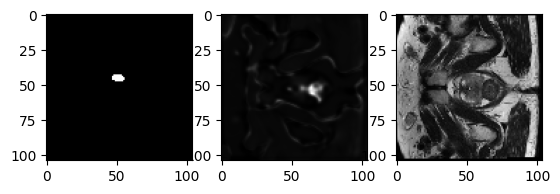


Epoch:  2  loss :  1.107051587674185 Accuracy:  89.31540847983453

Epoch:  3  loss :  0.8868708177392061 Accuracy:  89.25


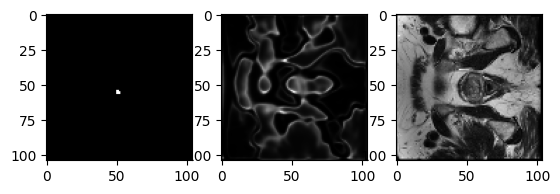


Epoch:  4  loss :  0.9116754286313379 Accuracy:  88.84324324324324

Epoch:  5  loss :  0.8920278204018558 Accuracy:  88.98612593383137


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
acc_curve = []
loss_curve = []
epochs = 10

for epoch in range(1,epochs):
  train_loss = 0
  z = 0
  acc = 0
  for x, batch in enumerate(loader):
    images, labeled, ISUP_case = batch
    
    # print( k)
    if(torch.sum(labeled) == 0):
      if(np.random.rand() <  0.5):
        continue

    images = images.to(device).float()
    labeled = labeled.to(device).float()
    
    # ISUP_case = nn.functional.one_hot(ISUP_case).to(device)
    images = images.permute(1,0,2,3)
    labeled = labeled.permute(1,0,2,3)
    k = [labeled[i].max() for i in range(len(labeled))]
    # print(k)
    k = replace(int(ISUP_case), k)
    k = torch.as_tensor(k).to(device)
    encoderO.zero_grad()
    
    # labelO, reconO, out = encoder(images)
    out,ISUPO = encoder(images)
    loss = bce_dice_loss(out,labeled)+nn.functional.cross_entropy(ISUPO, k)
    # + nn.functional.mse_loss(labelO, labeled) + nn.functional.cross_entropy(ISUPO, ISUP_case)
    loss.backward()
    acc += torch.sum(torch.argmax(ISUPO, 1) == k).item()
    # print(torch.sum(torch.argmax(ISUPO, 1) == k))
    train_loss+=loss.detach().item()
    z+=1
    encoderO.step()
    # if(z >= 5):
    #   break
    if(epoch%2 == 0 and x == 100):
      plt.subplot(1,3,1)
      plt.imshow(labeled[25][0].cpu().detach().numpy(), cmap = 'gray')
      plt.subplot(1,3,2)
      plt.imshow(out[25][0].cpu().detach().numpy(), cmap = 'gray')
      plt.subplot(1,3,3)
      plt.imshow( images[25][0].cpu().detach().numpy(), cmap = 'gray')
      plt.show()
  acc_curve.append(acc/(50*z)*100)
  loss_curve.append(train_loss/z)
  print("\nEpoch: ",epoch," loss : ",float(train_loss/z), "Accuracy: ", acc/(50*z)*100)

In [ ]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(encoder.cpu(), pickle_out)
pickle_out.close()

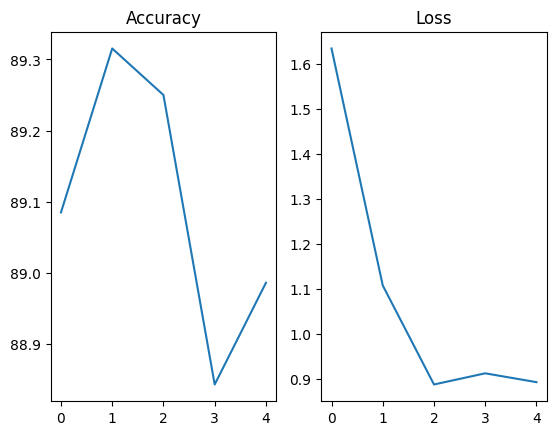

In [ ]:
plt.subplot(1,2,1)
plt.plot(acc_curve)
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(loss_curve)
plt.title("Loss")
plt.show()

In [ ]:
!pip install streamlit
!streamlit run untitled12.py